# Appendix

### Data smoothing

In some cases, you may need a smooth curve rather than a harsh curve. To this end, [Savitzky–Golay filter](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter)(SG filter) may be a reasonable choice. 

#### Savitzky–Golay filter

In short, the SG filter replaces each of the data points with the weighted average among its neighbors. The details can be found [here](https://en.wikipedia.org/wiki/Savitzky%E2%80%93Golay_filter).

The implement of Savitzky–Golay filter here utilizes *scipy*, the scientific computing library.

The [function of Savitzky–Golay](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.savgol_filter.html) is in the following form:

``` python
scipy.signal.savgol_filter(x, window_length, polyorder, 
                           deriv=0, delta=1.0, axis=-1, mode='interp', cval=0.0)
```
##### parameters
**x : *array_like*** The data to be filtered. If x is not a single or double precision floating point array, it will be converted to type numpy.float64 before filtering.

**window_length : *int*** The length of the filter window (i.e. the number of coefficients). window_length must be a positive odd integer. If mode is ‘interp’, window_length must be less than or equal to the size of x.

**polyorder : *int*** The order of the polynomial used to fit the samples. polyorder must be less than window_length.

**deriv : *int, optional*** The order of the derivative to compute. This must be a nonnegative integer. The default is 0, which means to filter the data without differentiating.

**delta : *float, optional*** The spacing of the samples to which the filter will be applied. This is only used if deriv > 0. Default is 1.0.

**axis : *int, optional*** The axis of the array x along which the filter is to be applied. Default is -1.

**mode : *str, optional*** Must be ‘mirror’, ‘constant’, ‘nearest’, ‘wrap’ or ‘interp’. This determines the type of extension to use for the padded signal to which the filter is applied. When the ‘interp’ mode is selected (the default), no extension is used. Instead, a degree polyorder polynomial is fit to the last window_length values of the edges, and this polynomial is used to evaluate the last window_length // 2 output values.

**cval : *scalar, optional*** Value to fill past the edges of the input if mode is ‘constant’. Default is 0.0.

##### Returns:

**y : *ndarray, same shape as x*** The filtered data.

##### Examples

Here are a few of examples that show the effect of the savgol filter. Feel free to change the parameters.

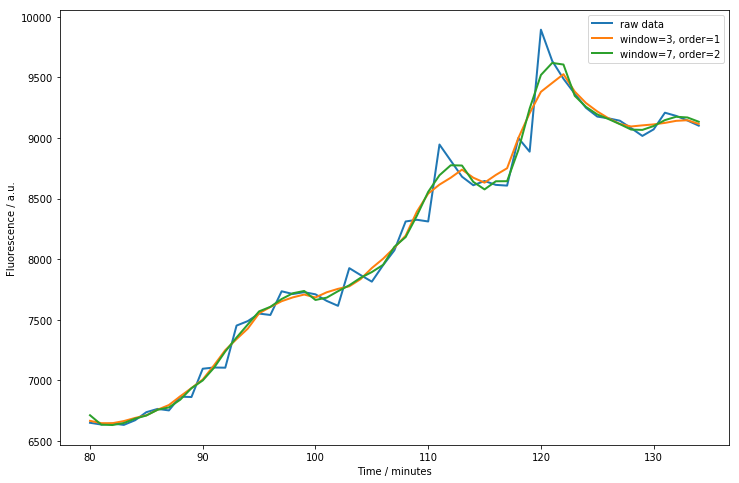

In [1]:
from scipy.signal import savgol_filter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.asarray(pd.read_csv('Data/appendix_1.csv').iloc[:]).reshape(-1)
time = np.linspace(0, data.shape[0]-1, data.shape[0])
sg_31 = savgol_filter(data, 5, 1)
sg_72 = savgol_filter(data, 7, 2)

start = 80
end = -1

plt.figure(figsize=(12, 8))
plt.plot(time[start:end], data[start:end], label='raw data', color='C0', linewidth=2)
plt.plot(time[start:end], sg_31[start:end], label='window=3, order=1', color='C1', linewidth=2)
plt.plot(time[start:end], sg_72[start:end], label='window=7, order=2', color='C2', linewidth=2)

plt.legend()
plt.xlabel('Time / minutes')
plt.ylabel('Fluorescence / a.u.')
plt.show()